  __*Simple Linear Regression:*__    __Y = b0 + b1 * X__

__Importing the libraries__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

__Importing the dataset__

In [2]:
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

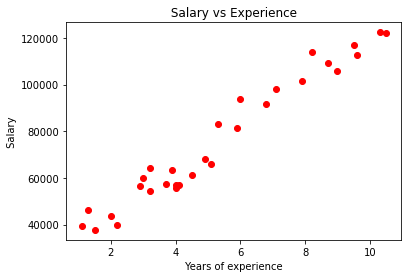

In [3]:
plt.scatter(X, y, color = 'red')
plt.title(' Salary vs Experience ')
plt.xlabel(' Years of experience ')
plt.ylabel(' Salary ')
plt.show()

__Splitting the dataset into the Training set and Test set__

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

__Training the Simple Linear Regression model on the Training set__

In [5]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

**Predicting the Test set resutls**

In [6]:
y_pred = regressor.predict(X_test)

__Visualising the Training set results__

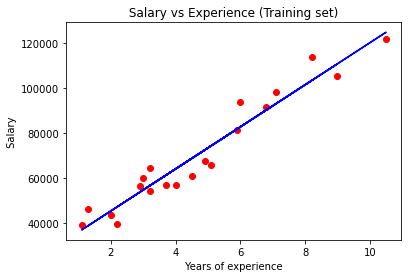

In [7]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train,regressor.predict(X_train), color = 'blue')
plt.title(' Salary vs Experience (Training set) ')
plt.xlabel(' Years of experience ')
plt.ylabel(' Salary ')
plt.show()

__Visualising the Test set results__

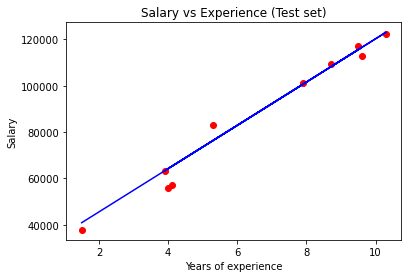

In [8]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test,regressor.predict(X_test), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()

__Making a single prediction__
with 12 years of experience

In [9]:
#the "predict" method always expects a 2D array as the format of its inputs
print(regressor.predict([[12]]))

[138967.5015615]


__Getting the final linear regression equation with the values of the coefficients__

In [10]:
print(regressor.coef_)  
print(regressor.intercept_)

[9345.94244312]
26816.19224403119


***The equation of this simple linear regression model***

In [11]:
a = (regressor.coef_)
b = (regressor.intercept_)
print(f"The equation of the simple linear regression model is:\n Salary = {a[0]} * YearsofExperience + {b}")

The equation of the simple linear regression model is:
 Salary = 9345.94244312237 * YearsofExperience + 26816.19224403119


**Regression Evaluation Metrics**


Here are three common evaluation metrics for regression problems:

*Mean Absolute Error* (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

*Mean Squared Error* (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

*Root Mean Squared Error* (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [12]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3426.4269374307123
MSE: 21026037.329511296
RMSE: 4585.4157204675885


__Simple Linear Regression without library__

__Import library__

In [13]:
from random import randrange
from csv import reader
from math import sqrt

__Load CSV File__

In [14]:
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

__Convert string column to float__

In [15]:
def str_column_to_float(dataset, column):
    for row in dataset[1:]:
        row[column] = float(row[column].strip())

__Split a dataset into a train & test set__

In [16]:
def train_test_split(dataset, split):
    train = list()
    train_size = split * len(dataset[1:])
    dataset_copy = list(dataset[1:])
    while len(train) < train_size:
        index = randrange(len(dataset_copy))
        train.append(dataset_copy.pop(index))
    return train, dataset_copy

__Calculate root mean squared error :__
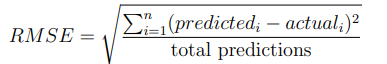

In [17]:
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

__Evaluate an algorithm using a train/test split__

In [18]:
def evaluate_algorithm(dataset, algorithm, split, *args):
    train, test = train_test_split(dataset[1:], split)
    test_set = list()
    for row in test:
        row_copy = list(row)
        row_copy[-1] = None
        test_set.append(row_copy)
    predicted = algorithm(train, test_set, *args)
    actual = [row[-1] for row in test]
    rmse = rmse_metric(actual, predicted)
    return rmse

__Calculate the mean value of a list of numbers:__

In [19]:
def mean(values):
    return sum(values) / float(len(values))

__Calculate the variance of a list of numbers :__
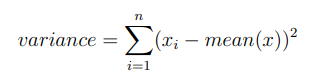

In [20]:
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])

__Calculate Covariance between x and y :__
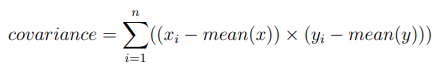

In [21]:
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar

__Calculate coefficients :__
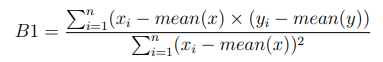 similar to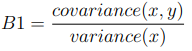 and 
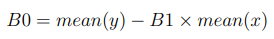

In [22]:
def coefficients(dataset):
    x = [row[0] for row in dataset[1:]]
    y = [row[1] for row in dataset[1:]]
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]

__Simple linear regression algorithm :__

In [23]:
def simple_linear_regression(train, test):
    predictions = list()
    b0, b1 = coefficients(train)
    for row in test:
        yhat = b0 + b1 * row[0] # ŷ the predicted value of y 
        predictions.append(yhat)
    return predictions

__Simple linear regression on the dataset :__

In [24]:
from random import randrange
from csv import reader
from math import sqrt

# load and prepare data
filename = 'Salary_Data.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])):
    str_column_to_float(dataset, i)
# evaluate algorithm
split = 1/3
rmse = evaluate_algorithm(dataset, simple_linear_regression, split)
print('RMSE: %.7f' % (rmse))

RMSE: 7065.8698595


In [25]:
b=coefficients(dataset)
print(b)

[25792.20019866869, 9449.962321455077]


__The equation of the simple linear regression model is:__

In [26]:
print(f" {dataset[0][1]} = {a[0]} * {dataset[0][0]} + {b}")

 Salary = 9345.94244312237 * YearsExperience + [25792.20019866869, 9449.962321455077]


In [27]:
train, test = train_test_split(dataset[1:], split)
simple_linear_regression(train, test)

[33887.243835616435,
 49107.19977634889,
 50058.44702264467,
 51960.94151523623,
 51960.94151523623,
 56717.17774671512,
 58619.672239306674,
 59570.919485602455,
 60522.16673189823,
 64327.15571708135,
 71937.13368744758,
 77644.61716522225,
 78595.86441151804,
 89059.58412077159,
 96669.56209113782,
 99523.30383002515,
 104279.54006150404,
 111889.51803187028,
 112840.76527816606]

In [28]:
#Predicted value of Salary with 12 years of experience is: 
y = b[0] + b[1]*12
y

139191.7480561296

In [29]:
for row in dataset[1:]:
    yhat = b[0] + b[1] * row[0]
    print("Expected=%.3f, Predicted=%.3f" % (row[-1], yhat))

Expected=39343.000, Predicted=36187.159
Expected=46205.000, Predicted=38077.151
Expected=37731.000, Predicted=39967.144
Expected=43525.000, Predicted=44692.125
Expected=39891.000, Predicted=46582.117
Expected=56642.000, Predicted=53197.091
Expected=60150.000, Predicted=54142.087
Expected=54445.000, Predicted=56032.080
Expected=64445.000, Predicted=56032.080
Expected=57189.000, Predicted=60757.061
Expected=63218.000, Predicted=62647.053
Expected=55794.000, Predicted=63592.049
Expected=56957.000, Predicted=63592.049
Expected=57081.000, Predicted=64537.046
Expected=61111.000, Predicted=68317.031
Expected=67938.000, Predicted=72097.016
Expected=66029.000, Predicted=73987.008
Expected=83088.000, Predicted=75877.001
Expected=81363.000, Predicted=81546.978
Expected=93940.000, Predicted=82491.974
Expected=91738.000, Predicted=90051.944
Expected=98273.000, Predicted=92886.933
Expected=101302.000, Predicted=100446.903
Expected=113812.000, Predicted=103281.891
Expected=109431.000, Predicted=10800